# Loan Approval Prediction

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
  

In [2]:
data = pd.read_csv(r'C:\Users\Ann\Desktop\fbn trainee marina\machine learning for steve practical\scenario 2\LoanApprovalPrediction.csv') 

In [3]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(598, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [6]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [7]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [9]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
data.nunique()

Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      491
CoapplicantIncome    283
LoanAmount           200
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [11]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [12]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

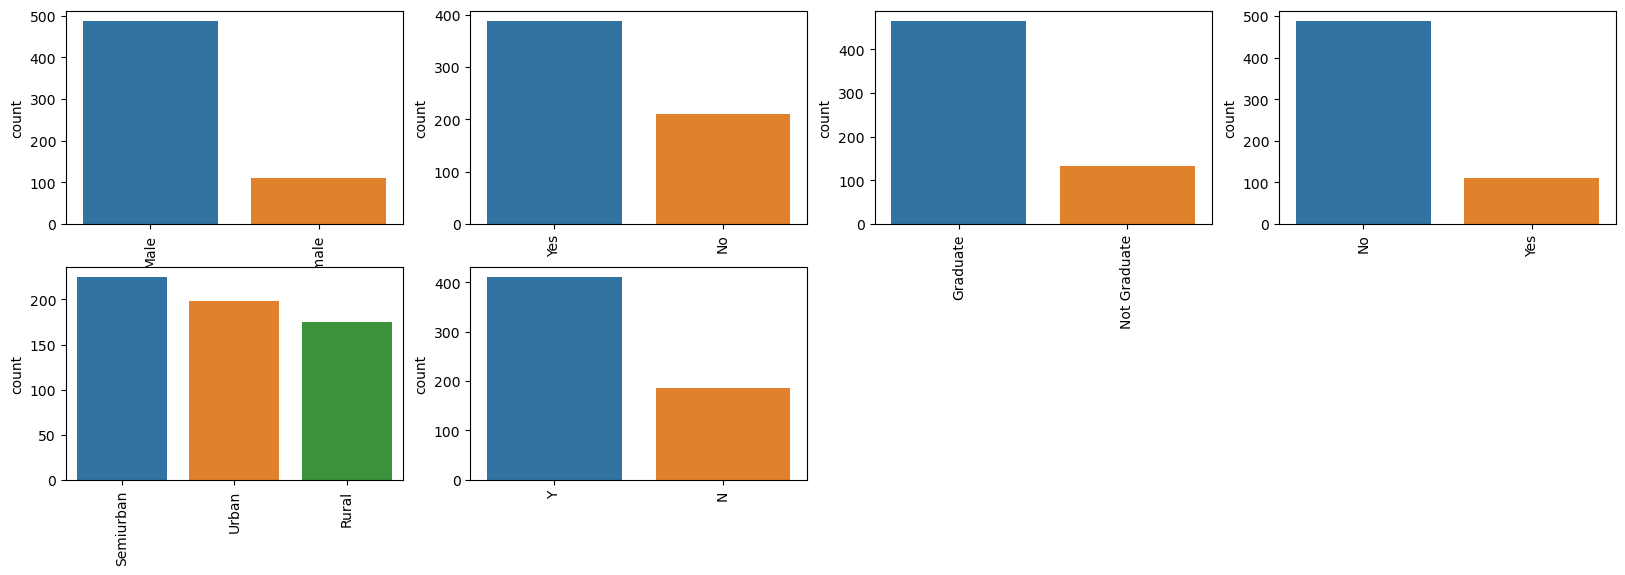

In [13]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(20,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [14]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int32  
 1   Married            598 non-null    int32  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int32  
 4   Self_Employed      598 non-null    int32  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int32  
 11  Loan_Status        598 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 42.2 KB


In [16]:
# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

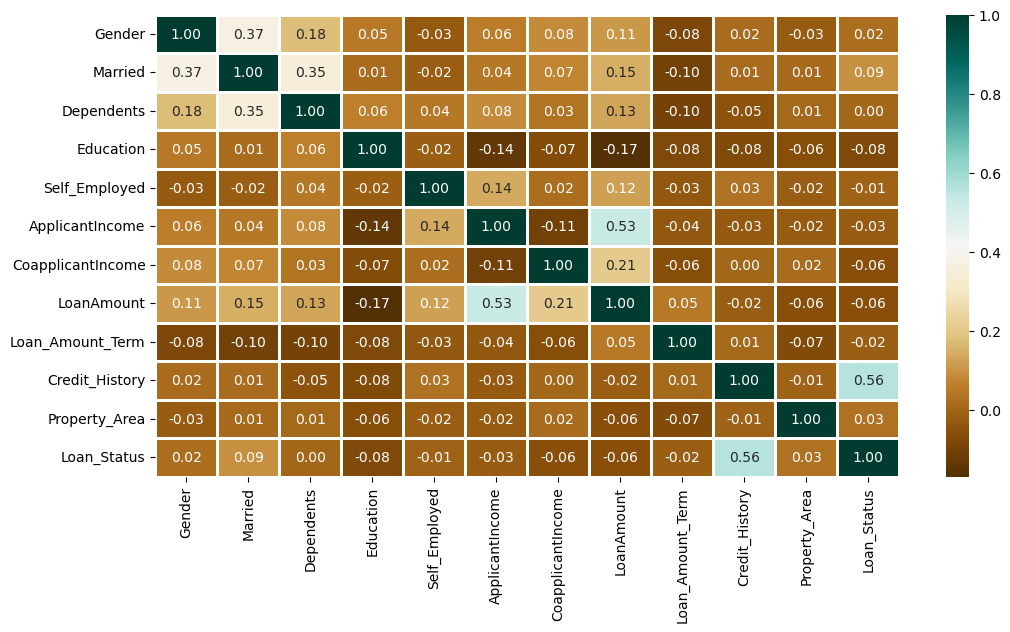

In [17]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

C:\Users\Ann\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


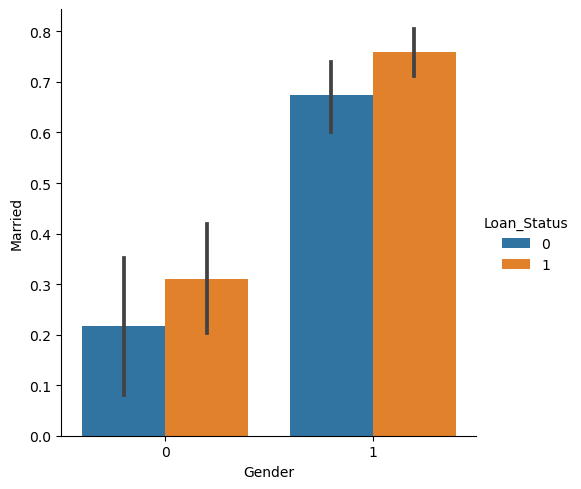

In [18]:
sns.catplot(x="Gender", y="Married", 
            hue="Loan_Status",  
            kind="bar",  
            data=data)

In [19]:
for col in data.columns: 
  data[col] = data[col].fillna(data[col].mean())  
    
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


X = data.drop(['Loan_Status'], axis=1)
Y = data['Loan_Status']

# Display the shape of the data
X.shape, Y.shape

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [21]:
# Initializing the classifiers
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression()
dtc = DecisionTreeClassifier(random_state=7)

# List of classifiers
classifiers = [rfc, knn, svc, lc, dtc]



For RandomForestClassifier, Accuracy score is 0.825
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        73
           1       0.85      0.92      0.88       167

    accuracy                           0.82       240
   macro avg       0.80      0.77      0.78       240
weighted avg       0.82      0.82      0.82       240



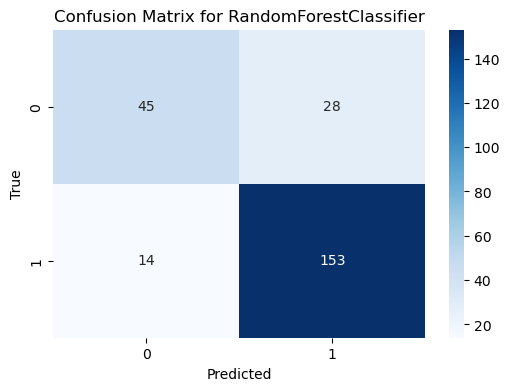


For KNeighborsClassifier, Accuracy score is 0.6375
              precision    recall  f1-score   support

           0       0.37      0.26      0.30        73
           1       0.71      0.80      0.75       167

    accuracy                           0.64       240
   macro avg       0.54      0.53      0.53       240
weighted avg       0.61      0.64      0.62       240



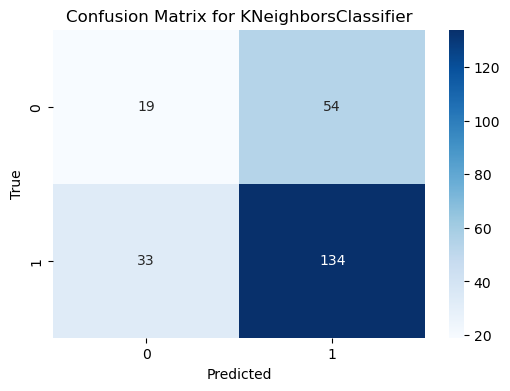


For SVC, Accuracy score is 0.6916666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.69      0.99      0.82       167

    accuracy                           0.69       240
   macro avg       0.35      0.50      0.41       240
weighted avg       0.48      0.69      0.57       240



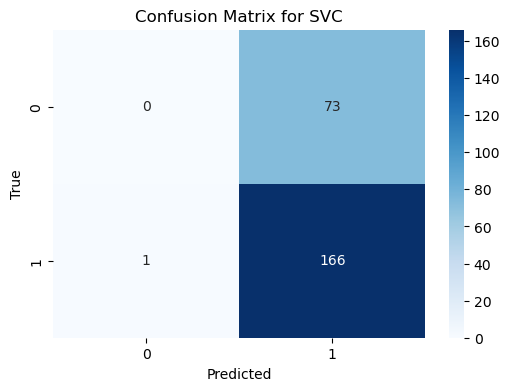

C:\Users\Ann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        73
           1       0.81      0.94      0.87       167

    accuracy                           0.80       240
   macro avg       0.79      0.71      0.73       240
weighted avg       0.80      0.80      0.78       240



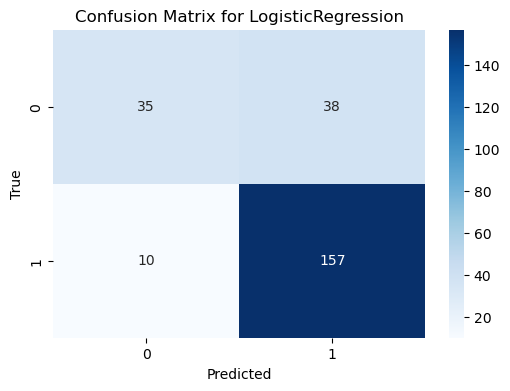


For DecisionTreeClassifier, Accuracy score is 0.6875
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        73
           1       0.78      0.77      0.77       167

    accuracy                           0.69       240
   macro avg       0.63      0.64      0.64       240
weighted avg       0.69      0.69      0.69       240



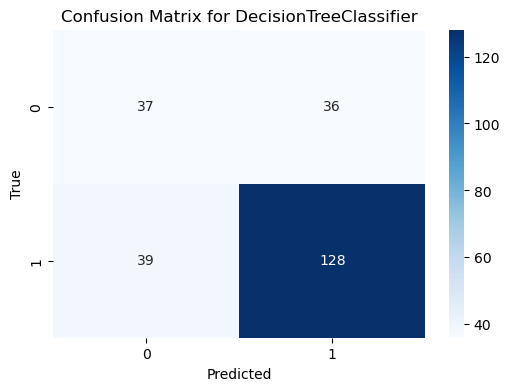

In [22]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Making predictions on the training and testing sets, and displaying the metrics
for clf in classifiers:
    clf.fit(X_train, Y_train)
    
    # Predictions on the testing set
    Y_test_pred = clf.predict(X_test)
    print(f"\nFor {clf.__class__.__name__}, Accuracy score is {metrics.accuracy_score(Y_test, Y_test_pred)}")
    print(metrics.classification_report(Y_test, Y_test_pred))
    plot_confusion_matrix(Y_test, Y_test_pred, clf.__class__.__name__)


In [23]:
models = pd.DataFrame({
    'Model' : ['Random Forest','KNN', 'SVC', 'Logistic Regression', 'Decision Tree'],
    'Precision':['0.85', '0.71', '0.69','0.81','0.78'],
    'Recall':['0.92', '0.80', '0.99', '0.94','0.77'],
    'F1-Score':['0.88', '0.75', '0.82', '0.87','0.77'],
     'Accuracy' : ['0.825', '0.638', '0.691', '0.80','0.688']
})


models.sort_values(by = 'F1-Score', ascending = False)

,Model,Precision,Recall,F1-Score,Accuracy
0,Random Forest,0.85,0.92,0.88,0.825
3,Logistic Regression,0.81,0.94,0.87,0.80
2,SVC,0.69,0.99,0.82,0.691
4,Decision Tree,0.78,0.77,0.77,0.688
1,KNN,0.71,0.80,0.75,0.638


Random Forest model stands out as the best overall choice based on the provided metrics. It offers the best balance of precision, recall, F1-Score, and accuracy, making it a robust model for loan approval prediction. ​

While Logistic Regression also performs well, especially in recall, Random Forest's higher accuracy and well-rounded performance make it the preferable option.​